# Regression Overview

### Regression is a supevised machine learning technique used to model the relationship of one or more features (independent variables) to one of more targets (dependent variables). 

<div class="alert alert-block alert-info">
**Regression**: prediction of a continuous outcome


<div class="alert alert-block alert-info">
**Classification**: prediction of a Categorical Variable


### Data Scaling:
   - **Why**:
        - data visualization
        - distance calculation
        - compare units
   - **Data Scaling Categories**:
       - linear: the space between each point is maintained
       - non-linear: the space between each point will be different in the output

____________________________

### Feature Engineering
   - transform raw data to better represent the problem to our predictive models     
       - (ex): drop columns, create new columns, domain knowledge
<br>

#### Automated Feature Selections:
- **Select K Best**: selects the tio k features based on stats best
- **Recursive Feature Elimination (RFE)**: 
    - builds model and drops the least imporant feature 
    - continuously drops features until down to specified number of features

### Evaluation
- **Ask yourself**:
1. does the model add value
2. which model is better
3. how confident I am in this model

- **Error** = actual value - predicted values

### Baseline: 
- predicted value = average value
- the average of the target variable

_________________________

### Modeling:

- y = mx +b (single variable)
- y = b+ m1x1 + m2x2 + m3x3 (multiple variables)

## Example
#### Predict tip amount based on party size and bill amount
- tip = .0927 total_bill + .1926 size + .6689
<br>

- **y** =tip
- **$\hat{y}$** = predicated tip, the sum of the features times their coeffients
- **x** = [total_bill, size] -- ([total_bill, size, 1])
- **w** = [.0927, .1926, .6689]
- **error** = difference between predicted and actual tip


______________

### Types of Regression:
- **Simple Regression**: y= f(x)
- **Muliple Regression**: y=f($x_1$, $x_2$,...)
- **Univariate Regression**: y=f(x)
- **Multivariate Regression**: $y_1$, $y_2$, ... = f(x)

### Polynomial Regression:
- combine target variables together
- tip = ($w_1$ * $totalbill^2$) + ($w_2$ * total_bill) + ($w_3$ * total_bill * size) +($w_4$ * size) 

<hr style="border:2px solid black"> </hr>

# Scaling Numeric Data

### Data Science Pipeline:
    - Plan
    - Acquire
    - Prepare
        - train/test split
        - SCALERS
    - Explore
    - Model
    - Deliver

- Prepare, following train/test split, before EDA (Exploratory Data Analysis) 

**Scaling**: a transformation we apply to our data in order to increase consistency when comparing independent variables and implementation into distance-based algoriths.

<br>
- using sklearn on training set only

## Why Scale??:
- 1. comparing two independent variables
- 2. using data to train models for distance-based algoriths
- 3. normalizing data to fit the assumptive needs of certain algoriths or tests

### Min-Max Scaler:
- AKA: Min-Max normalization
- min value to max value
- on scale from 0 to 1
- our "go-to" scaler for most cases
<br>

- you **have** to scale the x and y variable to have the same scale so that you have a **level playing field**
<br>

- Cartesean origin (0,0)
<br>

- must be aware of **outliers** because they will greatly affect your scale/ data
    - note whatever decision you make (keep or remove)

Very cool comparisons: https://stats-demos.zach.wiki/scaling

___________________________

# Examples of Scaling:
- create a classifier that predicts whether or not a party is a smoking table based on tip value and total bill

### Our Steps:
1. create
2. make object
3. fit to data
4. use it

In [6]:
#imports
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#acquire from pydataset
df = data('tips')

In [3]:
#look at data
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#get dtype, size, nulls, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [7]:
#split the data
train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

<div class="alert alert-block alert-info">
CANNOT stratify in train, test split with Regression 

In [8]:
#get shape of all 3 datasets
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

In [9]:
#create the scaler
#fit the scaler
#use the scaler

In [10]:
#assign to variable #need scaler for each independent variable
#create it
scaler_tip = MinMaxScaler()

In [11]:
#fit it
scaler_tip.fit(train[['tip']])

MinMaxScaler()

In [12]:
#use it
#make a new column within train
#use 'transform' instead of 'predict'
train['tip_minmax'] = scaler_tip.transform(train[['tip']])

In [14]:
#take a look at just tip and tipminmax
train[['tip', 'tip_minmax']].head()

,tip,tip_minmax
19,3.50,0.31250
173,5.15,0.51875
119,1.80,0.10000
29,4.30,0.41250
238,1.17,0.02125


In [15]:
#descriptive statistics on columns i will be using to answer the question
train[['tip', 'total_bill', 'tip_minmax']].describe()

,tip,total_bill,tip_minmax
count,136.000000,136.000000,136.000000
mean,2.946985,18.790515,0.243373
std,1.456611,8.779733,0.182076
min,1.000000,3.070000,0.000000
25%,2.000000,12.645000,0.125000
50%,2.680000,16.710000,0.210000
75%,3.500000,22.752500,0.312500
max,9.000000,48.330000,1.000000


In [16]:
# apply the saved sclaer to our validate and test sets
validate['tip_minmax'] = scaler_tip.transform(validate[['tip']])
test['tip_minmax'] = scaler_tip.transform(test[['tip']])

<ipython-input-16-45b223bf4dfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['tip_minmax'] = scaler_tip.transform(test[['tip']])


In [17]:
test.head()

,total_bill,tip,sex,smoker,day,time,size,tip_minmax
113,38.07,4.00,Male,No,Sun,Dinner,3,0.37500
20,20.65,3.35,Male,No,Sat,Dinner,3,0.29375
188,30.46,2.00,Male,Yes,Sun,Dinner,5,0.12500
170,10.63,2.00,Female,Yes,Sat,Dinner,2,0.12500
32,18.35,2.50,Male,No,Sat,Dinner,4,0.18750


### Streamline the process

In [18]:
#fit and transform at the same time:
totalbillminmax= MinMaxScaler()
train['total_bill_minmax'] = totalbillminmax.fit_transform(train[['total_bill']])

(array([29., 37., 31., 19.,  4.,  7.,  5.,  2.,  1.,  1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

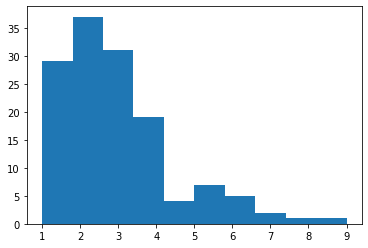

In [20]:
#not scaled tip
plt.hist(train['tip'])

(array([29., 37., 31., 19.,  4.,  7.,  5.,  2.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

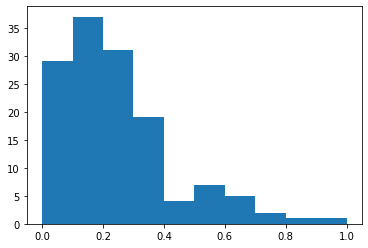

In [21]:
#min max scaler (0-1)
plt.hist(train['tip_minmax'])

In [25]:
#Comparison - try with robust scaler and standard scaler
#fit and transform in one step
train['robust_tip'] = RobustScaler().fit_transform(train[['tip']])
train['standard_tip'] = StandardScaler().fit_transform(train[['tip']])

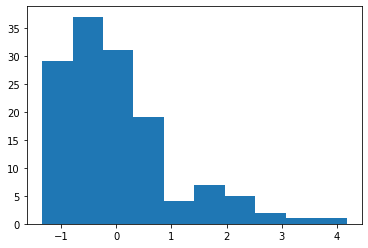

In [26]:
#standard scaler histogram of tip
plt.hist(train['standard_tip'])
plt.show()

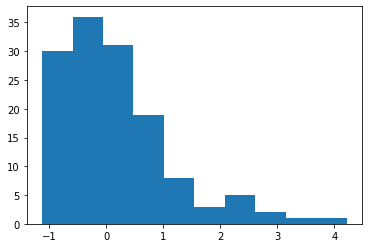

In [27]:
#robust scaler histogram of tip
plt.hist(train['robust_tip'])
plt.show()

<hr style="border:2px solid black"> </hr>

# More Scaling: John Salas

- ML models cannot read column names
- the more your model relies on distance... the more scaling will affect your results
- random forest and decision tree are **NOT** affected by scaling
- KNN can be significantly improved by scaling
- scaling can help with visualization

<hr style="border:2px solid black"> </hr>

# Exploration

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

### Main Stages of exploration:
- bring in data wrangle
- hypothesize
- visualize: heatmaps, scatterplots, pairgrid, jointplot
- Test your hypothesis


<div class="alert alert-block alert-info">
    
Take these steps:
1. Look
2. Guess
3. Test
4. Conclude

## Types of Visuals:

#### Univariate Distribution:

- **Continuous varible distributions**:
     - df.[col].hist(grid=False, bins=10)
     - sns.displot(x, data)
     - sns.boxplot(data)
- **Discrete variable distribution**:
     - sns.countplot(x='discrete_var', data)

#### Continious with Continuous:

- Seaborn pairplot to create a scatter matrix visualizing all continous variable relationships along with individiual distributions.
    - sns.pairplot(data)
- Seaborn relplot for a simple scatter plot of two continuous variables.
    - sns.relplot(x, y, data, kind=scatter)
- Seaborn lmplot for a simple scatter plot of two continous variables with a regression line. I can pass a discrete variable to col or hue to bring in another dimension, too.
    - sns.lmplot(x, y, data, scatter=True, hue=None, col=None)
- Seaborn jointplot for a simple scatter plot of two continuous variables with a regression line and the addition of a histogram for each variable.
    - sns.jointplot(x, y, data, kind=scatter)
- Seaborn heatmap of Correlation Coefficients for all numeric columns in a dataset.
    - sns.heatmap(train.corr())

#### Discrete with Continuous

- Seaborn swarmplot or stripplot to examine a discrete variable by a continuous.
    - sns.swarmplot(x='discrete_var', y='continuous_var', data=train)
    - sns.stripplot(x='discrete_var', y='continuous_var', data=train)
- Seaborn boxplot, violinplot, or barplot to show the distribution of a continuous variable by a discrete variable.
    - sns.boxplot(x='discrete_var', y='continuous_var', data=train)
    - sns.violinplot(x='discrete_var', y='continuous_var', data=train)
    - sns.barplot(x='discrete_var', y='continuous_var', data=train)

#### Discrete with Discrete

- Seaborn heatmap with a pandas crosstab to examine discrete variables with discrete.
    - ctab = pd.crosstab(index, columns, values)
    - sns.heatmap(ctab, annot=True)


________________________________

In [ ]:
#Split your Data to avoid leakage

In [ ]:
#not normally distributed- use Spearman's instead of Pearson's

<hr style="border:2px solid black"> </hr>

# Evaluating Regression Models

### Vocab:

- Sum of squared Errors (SSE)
    - squared distances between actual and predicted data points

<br>

- Mean Squared Error (MSE)
    - average size of the squares

<br> 

- Root Mean Squared Error (RMSE)
    - same units as y-value
    - average length of one side of the square

<br>

- Total Sum of Squares (TSS)
    - distances between actual and average y-values

<br>

- Explained Sum of Squares (ESS)
    - distance between prediction and average y-values

<br>

- $R^2$ - explained variance
    - ratio of ESS to TSS
    - $R^2$ = 1 ; a ***perfect*** model
    - **baseline**: ESS = 0, $R^2$= 0
        - AKA intercept only model
        - just a horizontal line

## WHY evaluate models? WHY does it matter?

- Does this model add any value?
- Which model is better?
- How confident am I in my model's predictions?

## IMPORTANT!
- rmse: how far off the typical prediction is; same units as the target; smaller is better
- $R^2$: variance in y explained by X; closer to 1 is better

__________________________________

### EXERCISES

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)

df = pd.DataFrame()
df['x1'] = np.random.randn(100)
df['x2'] = np.random.randn(100)
df['y'] = df.x1 + df.x2 + np.random.randn(100) * .5

df.head()

,x1,x2,y
0,-1.085631,0.642055,-0.091921
1,0.997345,-1.977888,-1.279595
2,0.282978,0.712265,2.095594
3,-1.506295,2.598304,1.436158
4,-0.578600,-0.024626,-0.606380


## Make predictions:

In [5]:
#Build the model/ fit the model
model = LinearRegression().fit(df[['x1', 'x2']], df.y)
df['yhat']= model.predict(df[['x1', 'x2']])

In [6]:
df['yhat_baseline'] = df.y.mean()

In [7]:
df.head()

,x1,x2,y,yhat,yhat_baseline
0,-1.085631,0.642055,-0.091921,-0.455018,-0.039992
1,0.997345,-1.977888,-1.279595,-1.075294,-0.039992
2,0.282978,0.712265,2.095594,0.949409,-0.039992
3,-1.506295,2.598304,1.436158,1.113599,-0.039992
4,-0.578600,-0.024626,-0.606380,-0.635276,-0.039992


## Calculate Evaluation Metrics:

In [9]:
#these are the residuals
df['residuals']= df.y - df.yhat

In [10]:
df['baseline_residuals'] = df.y - df.yhat_baseline

In [11]:
sse = (df.residuals **2).sum()
sse

23.398604227429

In [12]:
n = df.shape[0]

In [13]:
mse = sse/n
mse

0.23398604227429

In [16]:
rmse = math.sqrt(mse)
rmse

0.48372103765940344

In [18]:
sse_baseline = (df.baseline_residuals **2).sum()
mse_baseline = sse_baseline/n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse: {sse_baseline}
mse: {mse_baseline}
rmse: {rmse_baseline}
''')


Baseline:

sse: 236.31687655079307
mse: 2.3631687655079308
rmse: 1.5372601489363895



In [21]:
#model
ess= ((df.yhat - df.y.mean()) **2).sum()
tss = ((df.y- df.y.mean())**2).sum()

ess/tss

0.9009863173170374

In [22]:
#baseline
ess= ((df.yhat_baseline - df.y.mean()) **2).sum()
tss = ((df.y- df.y.mean())**2).sum()

print('ess: %4f' % ess)

ess/tss

ess: 0.000000


0.0

## Visualize Residuals

- if we find a pattern in the residuals means there is something in the model that wasnt captured
- residual of zero: means we predicted **perfectly**

<AxesSubplot:ylabel='Frequency'>

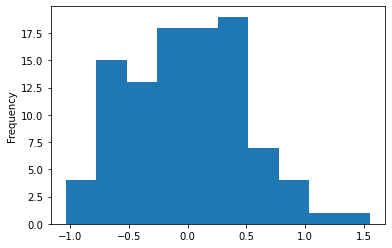

In [23]:
#distribution of baseline residuals
df.residuals.plot.hist()

#this shows:
#normally distributed
#equally likely to shoot high as we are to shoot low

<AxesSubplot:ylabel='Frequency'>

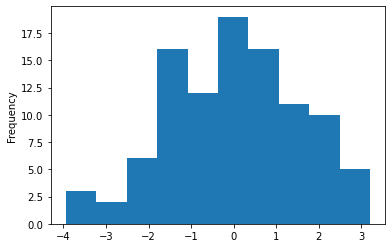

In [24]:
#distribution of baseline residuals
df.baseline_residuals.plot.hist()

#this shows:
#normally distributed
#larger spread (-4 to 3)

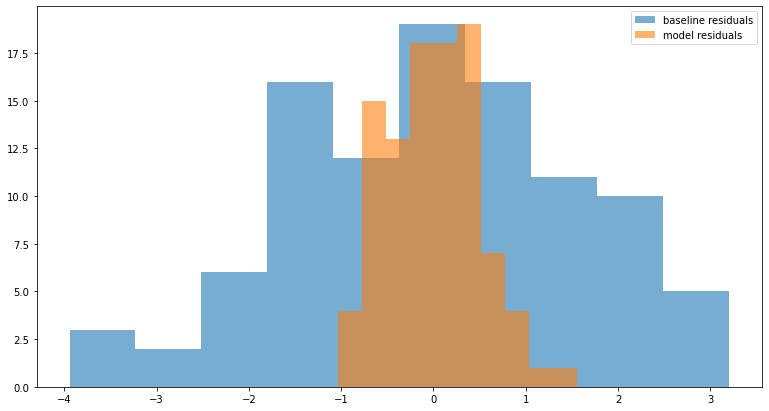

In [29]:
fig, ax = plt.subplots(figsize=(13,7))
ax.hist(df.baseline_residuals, label='baseline residuals', alpha = .6)
ax.hist(df.residuals, label='model residuals', alpha = .6)
ax.legend()

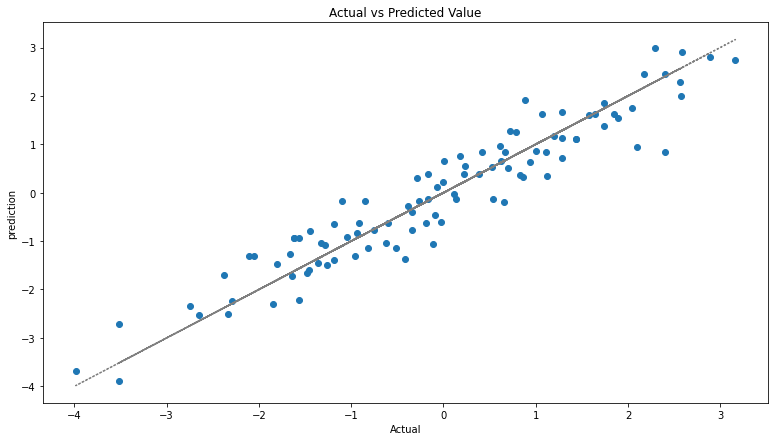

In [30]:
fig, ax = plt.subplots(figsize=(13,7))
ax.scatter(df.y, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel="prediction", xlabel='Actual')
ax.plot(df.y, df.y, ls=':', c='gray')

## "Easy" way to do this!

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

- to get rmse, take the square root of mean_squared_error
- r2_score == explained_variance_score

In [31]:
r2_score(df.y,df.yhat)

0.9009863173170377

In [32]:
r2_score(df.y, df.yhat_baseline)

0.0

In [33]:
mean_squared_error(df.y, df.yhat)

0.23398604227429

<hr style="border:2px solid black"> </hr>

# Feature Engineering

- when dataframes have **a lot** of columns, we can eliminate the columns that are not significant


### SelectKBest: 
- f_selector= SelecKBest(score_fun=f_regression, k=3) 
    - automatically chooses the top K features by running an F Test
    <br>
    
    - select k=?? to determine how many features we use
        - (ex): k=3; top 3 most predictive features used
        
        <br>
        
    - chooses the items that are most correlated and uses those depending on the K


### Recursive Feature Elimination (RFE):

- import: **from sklearn.feature_selection import RFE**

<br>

- creates multiple machine learning models

<br>
    
- uses entire dataset then works backwards to eliminate features
    - STEPS to take:
        - lm = LinearRegression()
        - rfe = RFE(estimator=lm, n_features_to_select=2)
        - rfe.fit(X_train_scaled, y_train)
        
        <br>
        
- CANNOT use with: KNN   
- CAN use with: Linear Regression or Decision Tree

<br>  

- **rfe.support_**: gives a mask showing which features are to 2 (in this case bc n_features_to_select=2)
    
    <br>
- **rfe.ranking_**: ranks features by importants 1 - ###...

In [ ]:
#pd.Series(dict(zip(X_train_scaled.columns, rfe.ranking_))).sort_values()